### Load the Data

In [3]:
import pandas as pd

# Load the Titanic dataset
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check for Missing Data

In [4]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Statistics Summary

In [6]:
# Summary statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


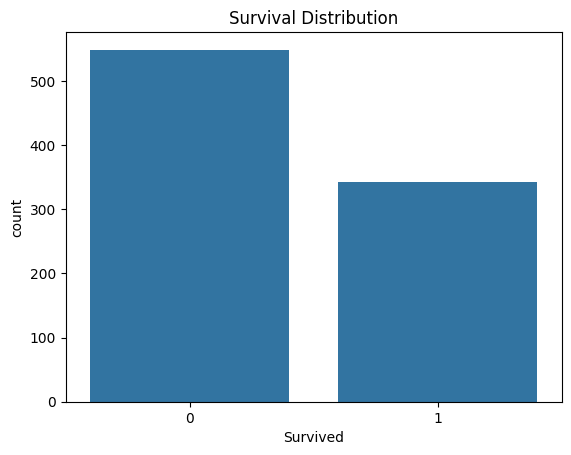

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of survivors
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')
plt.show()

### Filling in missing values

In [8]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [9]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [10]:
train_data.drop(columns=['Cabin'], inplace=True)

### Create a new Feature FamilySize

In [11]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

### Convert Gender to Numeric values 0 and 1

In [12]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

### Build a Predictive Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = train_data[features]
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

Accuracy of the model: 80.45%


### Removing Duplicates

In [ ]:
import pandas as pd

# Load the Titanic dataset
train_data = pd.read_csv('train.csv')

# Check for duplicate rows
duplicates = train_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")